In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SL_codes/water_potability.csv')
df.shape

(3276, 10)

In [5]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [6]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
train, test = train_test_split(df,test_size=0.2,random_state= 20)

In [8]:
train.isnull().mean()*100

ph                 15.076336
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.435115
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.732824
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [9]:
train['ph'] = train['ph'].fillna(train['ph'].mean())
test['ph'] = test['ph'].fillna(train['ph'].mean())

In [10]:
train['Sulfate'] = train['Sulfate'].fillna(train['Sulfate'].mean())
test['Sulfate'] = test['Sulfate'].fillna(train['Sulfate'].mean())

In [11]:
train['Trihalomethanes'] = train['Trihalomethanes'].fillna(train['Trihalomethanes'].mean())
test['Trihalomethanes'] = test['Trihalomethanes'].fillna(train['Trihalomethanes'].mean())

In [12]:
X_train = train.iloc[:,:-1]
Y_train = train.iloc[:,-1:]
X_test = test.iloc[:,:-1]
Y_test = test.iloc[:,-1:]

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [14]:
params = {
        'max_depth': [2, 3, 4, 5,6,7,8,9,10],
        'min_samples_leaf': [5, 8, 12, 15, 20],
        'max_features' : ['auto', 'sqrt', 'log2'],
        'min_samples_split' : [0.01,0.05,0.1]
}

In [15]:
clf_TUNED = DecisionTreeClassifier(random_state=20)
grid_search = GridSearchCV(estimator=clf_TUNED, param_grid=params,cv=5,n_jobs=-1, verbose=1, scoring ="accuracy")

In [16]:
grid_search.fit(X_train, Y_train)
grid_search.best_params_

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


{'max_depth': 7,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 0.01}

In [17]:
DT_clf = DecisionTreeClassifier(max_depth = 7, max_features = 'auto', min_samples_leaf = 5, min_samples_split=0.01,random_state=20)

In [18]:
DT_clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=7, max_features='auto', min_samples_leaf=5,
                       min_samples_split=0.01, random_state=20)

In [19]:
Y_pred = DT_clf.predict(X_test)
features = X_train.columns
importances = DT_clf.feature_importances_
indices = np.argsort(importances)

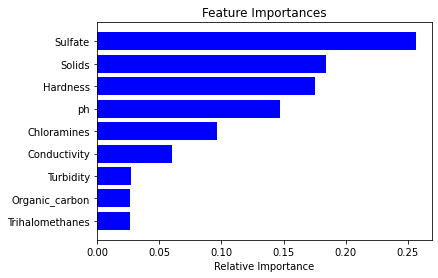

In [20]:
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [25]:
feat_imp_DT = pd.Series(DT_clf.feature_importances_,index=X_train.columns)

In [26]:
important_feat = list(feat_imp_DT.nlargest(5).index)

In [27]:
X_train_imp = X_train.loc[:,important_feat]
X_test_imp = X_test.loc[:,important_feat]

In [28]:
grid_search.fit(X_train_imp, Y_train)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=20), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 8, 12, 15, 20],
                         'min_samples_split': [0.01, 0.05, 0.1]},
             scoring='accuracy', verbose=1)

In [29]:
DT_clf_imp = DecisionTreeClassifier(max_depth = 9, max_features = 'auto', min_samples_leaf = 5, min_samples_split=0.01,random_state=20)

In [30]:
DT_clf_imp.fit(X_train_imp, Y_train)
Y_pred_imp = DT_clf_imp.predict(X_test_imp)
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(Y_test, Y_pred_imp)))
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred_imp)

Model accuracy score: 0.6372


In [31]:
roc_auc = auc(false_positive_rate, true_positive_rate)
print(confusion_matrix(Y_test, Y_pred_imp))
print(classification_report(Y_test,Y_pred_imp))

[[354  39]
 [199  64]]
              precision    recall  f1-score   support

           0       0.64      0.90      0.75       393
           1       0.62      0.24      0.35       263

    accuracy                           0.64       656
   macro avg       0.63      0.57      0.55       656
weighted avg       0.63      0.64      0.59       656



In [32]:
#random forest
param_grid_RF = {
              'n_estimators': [100,200,300,400,500],
              'max_features': ['auto', 'sqrt','log2'],
              'max_depth' : [6,7,8,9,10],
              'criterion' :['gini', 'entropy']
}
RFC = RandomForestClassifier(random_state=20)
Grid_rf= GridSearchCV(estimator=RFC, param_grid=param_grid_RF, cv= 5,n_jobs=- 1,verbose =1,scoring='roc_auc')

In [33]:
Grid_rf.fit(X_train, Y_train)
Grid_rf.best_params_

Fitting 5 folds for each of 150 candidates, totalling 750 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 400}

In [35]:
RF = RandomForestClassifier(n_estimators=400,max_features='auto',max_depth=10,criterion='entropy', random_state=20 ,verbose = 1)

In [37]:
RF.fit(X_train, Y_train)
Y_pred = RF.predict(X_test)
features = X_train.columns
importances = RF.feature_importances_
indices = np.argsort(importances)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    4.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.1s finished


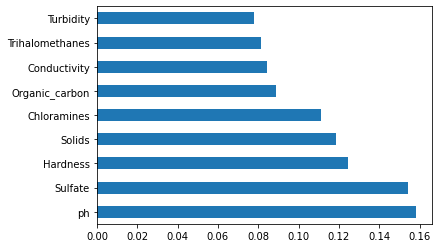

In [38]:
feat_imp_RF = pd.Series(RF.feature_importances_, index=X_train.columns)
feat_imp_RF.nlargest(15).plot(kind='barh')

In [39]:
important_feat = list(feat_imp_RF.nlargest(5).index)
X_train_imp = X_train.loc[:,important_feat]
X_test_imp = X_test.loc[:,important_feat]
Grid_rf= GridSearchCV(estimator=RFC,
param_grid=param_grid_RF, cv= 5,n_jobs=-1,verbose =1,scoring='roc_auc')
Grid_rf.fit(X_train_imp, Y_train)
Grid_rf.best_params_

Fitting 5 folds for each of 150 candidates, totalling 750 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'auto',
 'n_estimators': 300}

In [40]:
RF = RandomForestClassifier(n_estimators=300,max_features='auto',max_depth=9,criterion='gini', random_state=20 ,verbose = 1)
RF.fit(X_train_imp, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.3s finished


RandomForestClassifier(max_depth=9, n_estimators=300, random_state=20,
                       verbose=1)

In [41]:
Y_pred_imp = RF.predict(X_test_imp)
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(Y_test, Y_pred_imp)))
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred_imp)
roc_auc = auc(false_positive_rate,true_positive_rate)
print(confusion_matrix(Y_test, Y_pred_imp))
print(classification_report(Y_test, Y_pred_imp))

Model accuracy score: 0.6723
[[368  25]
 [190  73]]
              precision    recall  f1-score   support

           0       0.66      0.94      0.77       393
           1       0.74      0.28      0.40       263

    accuracy                           0.67       656
   macro avg       0.70      0.61      0.59       656
weighted avg       0.69      0.67      0.63       656



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished


In [42]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=20,learning_rate=0.01,eval_metric='auc')

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


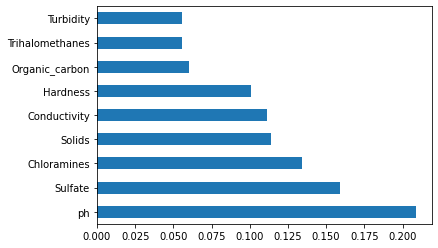

In [43]:
# fit the model with the training data
xgb_model.fit(X_train,Y_train)
feat_imp_xgb = pd.Series(xgb_model.feature_importances_,index=X_train.columns)
feat_imp_xgb.nlargest(15).plot(kind='barh')
imp_feat_xgb = list(feat_imp_xgb.nlargest(5).index)

In [44]:
X_train_xgb = X_train.loc[:,imp_feat_xgb]
X_test_xgb = X_test.loc[:,imp_feat_xgb]

In [45]:
params_xgb = {
              'max_depth': [4,5,6,7,8],
              'n_estimators': [100,200,300,400,500],
              'learning_rate': [0.1, 0.01, 0.05],
              'subsample':[i/10.0 for i in range(6,8)],
              'gamma':[i/10.0 for i in range(0,3)],
}
estimator = XGBClassifier(random_state=20, nthread=4)
grid_search_xgb = GridSearchCV(estimator=estimator, param_grid=params_xgb, cv=5, n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_train_xgb, Y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=XGBClassifier(nthread=4, random_state=20),
             n_jobs=-1,
             param_grid={'gamma': [0.0, 0.1, 0.2],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': [100, 200, 300, 400, 500],
                         'subsample': [0.6, 0.7]},
             verbose=1)

In [46]:
grid_search_xgb.best_params_

{'gamma': 0.0,
 'learning_rate': 0.01,
 'max_depth': 7,
 'n_estimators': 300,
 'subsample': 0.7}

In [52]:
final_xgb = XGBClassifier(base_score=0.5,booster='gbtree', colsample_bylevel=1, colsample_bynode=1,colsample_bytree=1, gamma=0.1, gpu_id=0, importance_type='gain', interaction_constraints='', learning_rate=0.01, max_delta_step=0, max_depth=8, min_child_weight=1, n_estimators=300, n_jobs=4, nthread=4, num_parallel_tree=1,random_state=20, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6, tree_method='exact', validate_parameters=1)
final_xgb.fit(X_train_xgb, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(gamma=0.1, gpu_id=0, interaction_constraints='',
              learning_rate=0.01, max_depth=8, n_estimators=300, n_jobs=4,
              nthread=4, num_parallel_tree=1, random_state=20, subsample=0.6,
              tree_method='exact', validate_parameters=1)

In [53]:
y_pred_xgb = final_xgb.predict(X_test_xgb)
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(Y_test, y_pred_xgb)))
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred_xgb)
roc_auc = auc(false_positive_rate, true_positive_rate)

Model accuracy score: 0.6677


In [48]:
#handling outliers
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = train["ph"].quantile(0.25)
q2 = train["ph"].quantile(0.75)

In [55]:
#finding out the value of Inter Quartile Range
IQR = q2 - q1
#defining max and min limits
max_limit = q2 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR)

In [56]:
#capping
train_ph= pd.DataFrame(np.where(train["ph"]> max_limit, max_limit, (np.where(train["ph"] < min_limit, min_limit, train["ph"]))), columns=["ph"])
train_ph


,ph
0,7.065913
1,6.039823
2,7.065913
3,7.369989
4,7.065913
...,...
2615,8.268308
2616,6.304769
2617,7.948488
2618,7.275909


In [57]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = train['Hardness'].quantile(0.25)
q2 = train['Hardness'].quantile(0.75)

In [58]:
#finding out the value of Inter Quartile Range
IQR = q2 - q1
#defining max and min limits
max_limit = q2 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR)

In [59]:
#capping
train_Hardness= pd.DataFrame(np.where(train['Hardness'] > max_limit, max_limit, (np.where(train['Hardness'] <min_limit, min_limit, train['Hardness']))), columns=["Hardness"])
train_Hardness

,Hardness
0,203.204659
1,164.026340
2,144.995790
3,236.476721
4,162.512684
...,...
2615,168.687890
2616,213.656178
2617,197.594542
2618,175.220376
